In [1]:
import autograd.numpy as np
import autograd as grad
import matplotlib.pyplot as plt
import scipy.integrate as integ
import scipy.fftpack as fft
from mpl_toolkits.mplot3d import Axes3D
from autograd.numpy import linalg as la
from scipy import io as spio
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
# plt.switch_backend('nbAgg')
plt.style.use("bmh")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.latex.preamble"] = [r"\usepackage{physics}", r"\usepackage{url}"]

In [3]:
mat = spio.loadmat('photos.mat')
I = np.array([mat['I' + str(i)] for i in range(1, 5)])

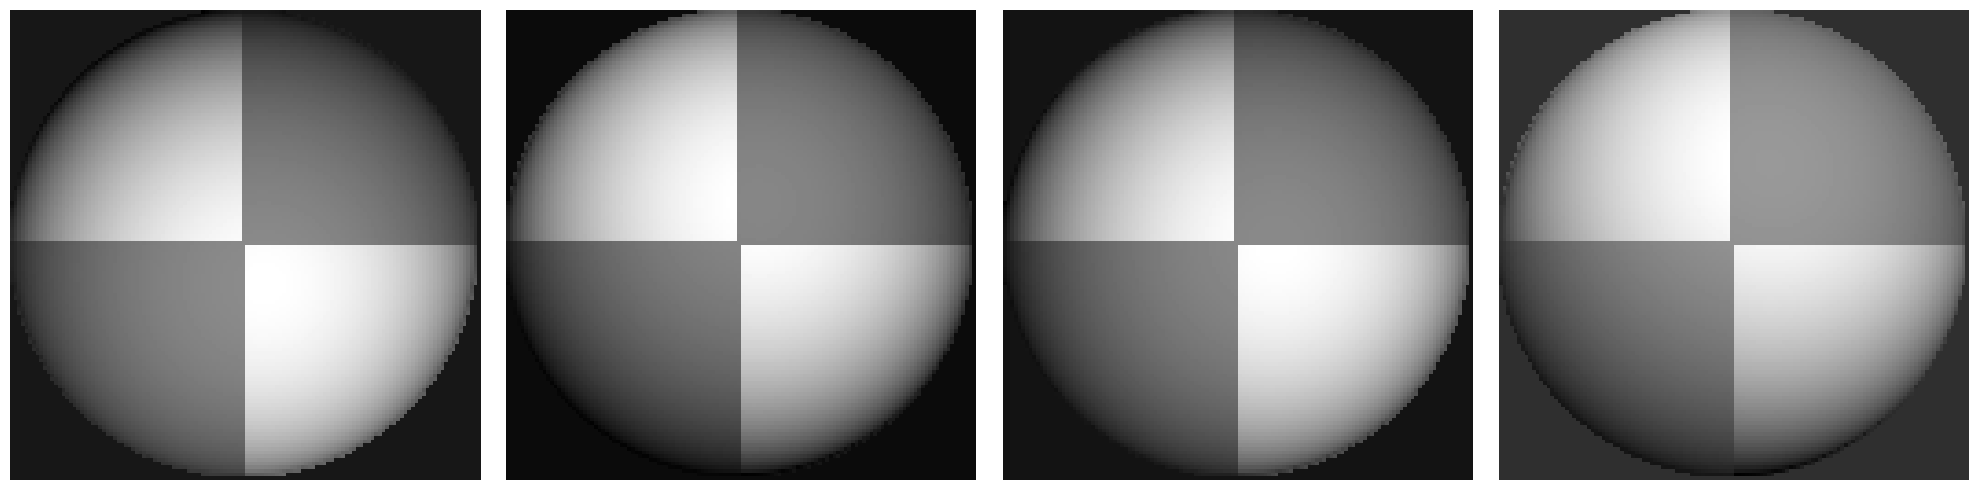

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(5*4, 5))

for i in range(4):
    ax[i].imshow(mat['I' + str(i+1)], 'gray')
    ax[i].grid(0)
    ax[i].axis('off')
plt.tight_layout()
# plt.savefig('intensity_maps.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
V = np.array([[0.085832,  0.17365, 0.98106],
              [0.085832, -0.17365, 0.98106],
              [0.17365 ,  0.00000, 0.98481],
              [0.16318 , -0.34202, 0.92542]])

In [11]:
g = la.inv(V.T.dot(V)).dot(V.T).dot(I.swapaxes(0, 1))
n = g/g.size
df_dx = np.nan_to_num(-n[0]/n[2])
df_dy = np.nan_to_num(-n[1]/n[2])

D:\ProgramData\Anaconda3\envs\compsense\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\envs\compsense\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [12]:
NN, MM = df_dx.shape
wx, wy = np.meshgrid(fft.fftfreq(MM)*2*np.pi,
                     fft.fftfreq(NN)*2*np.pi,
                     indexing='xy')
xx, yy = np.meshgrid(np.arange(MM), np.arange(NN))
num = -1j*wx*fft.fft2(df_dx) - 1j*wy*fft.fft2(df_dy)
den = wx**2 + wy**2 + np.finfo(float).eps
res = fft.ifft2(num/den)
res -= np.mean(res.real)

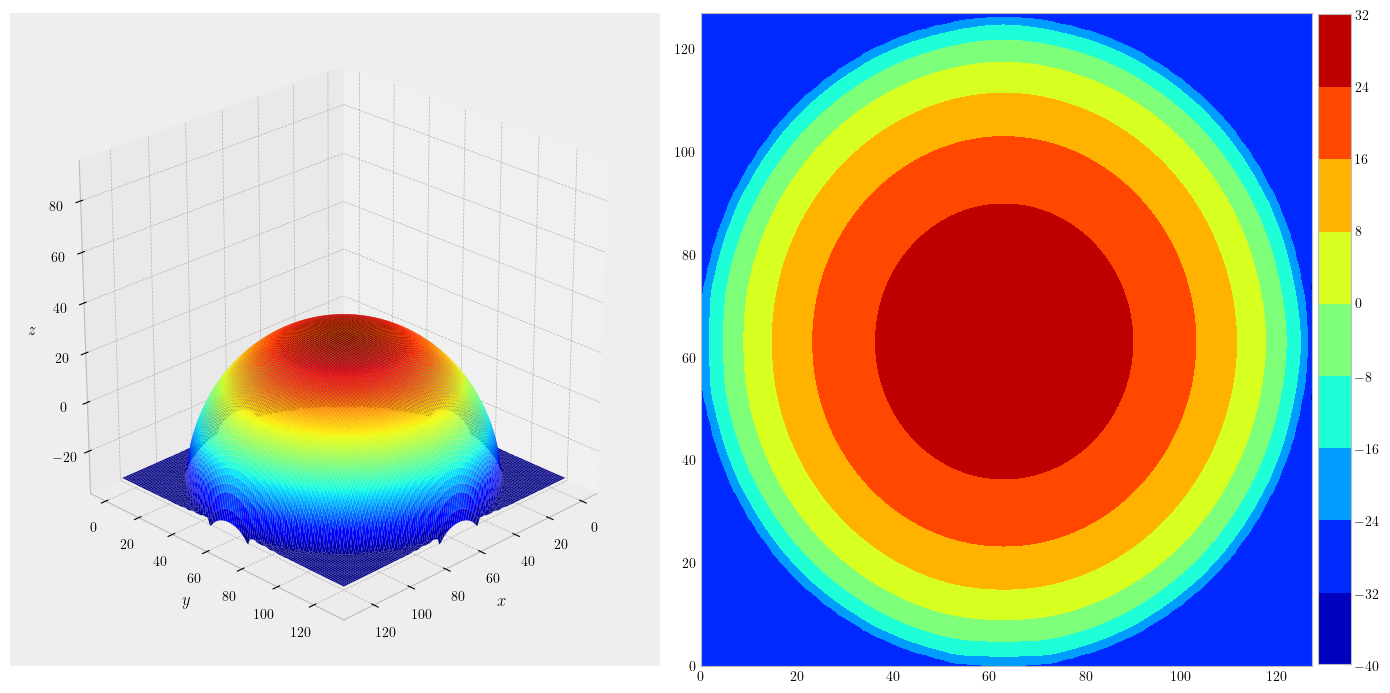

In [22]:
fig = plt.figure(figsize=(7*2, 7))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(azim=45, elev=25)
ax.plot_surface(xx, yy, res.real, cmap='jet', aa=True, cstride=1, rstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_zlim(-35, 128-35)

ax = fig.add_subplot(122)
im = ax.contourf(res.real, cmap='jet')
fig.colorbar(im, pad=0.01, fraction=0.05)

plt.tight_layout()
# plt.savefig('surface.png', dpi=300, bbox_inches='tight')
plt.show()